<a href="https://colab.research.google.com/github/theinem/Colombia-COVID-19-Basic-Analysis/blob/master/COVID_Colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Creación del disco en Drive y librerías**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = [6.0, 4.0] # valores originales

sns.set()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Carga del dataframe**

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/COVID Colombia/Casos_positivos_de_COVID-19_en_Colombia.csv')
df=df.rename(columns = {'ID de caso':'ID'})
df = df.set_index('ID')
df[:3]


,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais
ID,,,,,,,,,,,,,,,,,,
1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380.0
2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724.0
3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724.0


# **Descripción básica de la población**

Edades

In [4]:
df['Edad'].describe()

count    48746.000000
mean        38.966418
std         18.707877
min          0.000000
25%         26.000000
50%         36.000000
75%         51.000000
max        106.000000
Name: Edad, dtype: float64

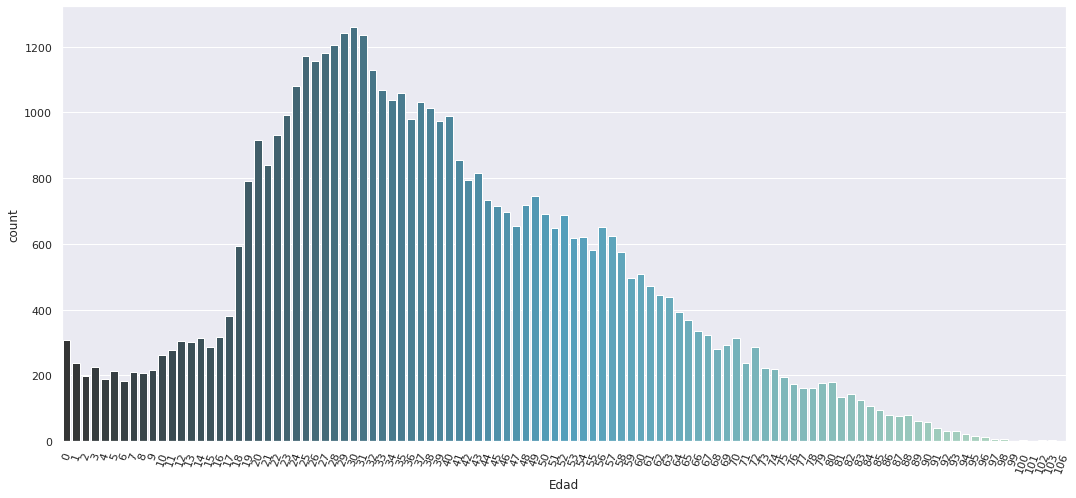

In [5]:
rcParams['figure.figsize'] = 18, 8
ax = sns.countplot('Edad', data = df, palette='GnBu_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
a=2

Sexo

Porcentajes de mujeres y hombres 
Mujeres: 44.31 % 
Hombres: 55.68 %


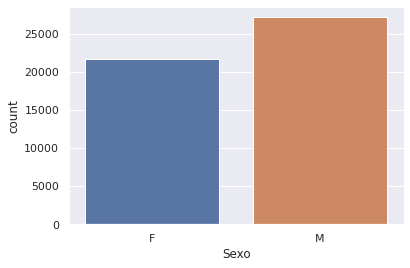

In [6]:
rcParams['figure.figsize'] = [6.0, 4.0] # valores originales
df['Sexo'] = df['Sexo'].str.upper() 
sns.countplot('Sexo', data = df)
cant_personas = df.shape[0]
cant_mujeres = df[df['Sexo']=='F'].shape[0]
cant_hombres = cant_personas - cant_mujeres
print('Porcentajes de mujeres y hombres contagiados \nMujeres: ' + str(cant_mujeres/cant_personas*100)[:5], '% \nHombres: ' + str(cant_hombres/cant_personas*100)[:5], '%')

Contagios por departamento

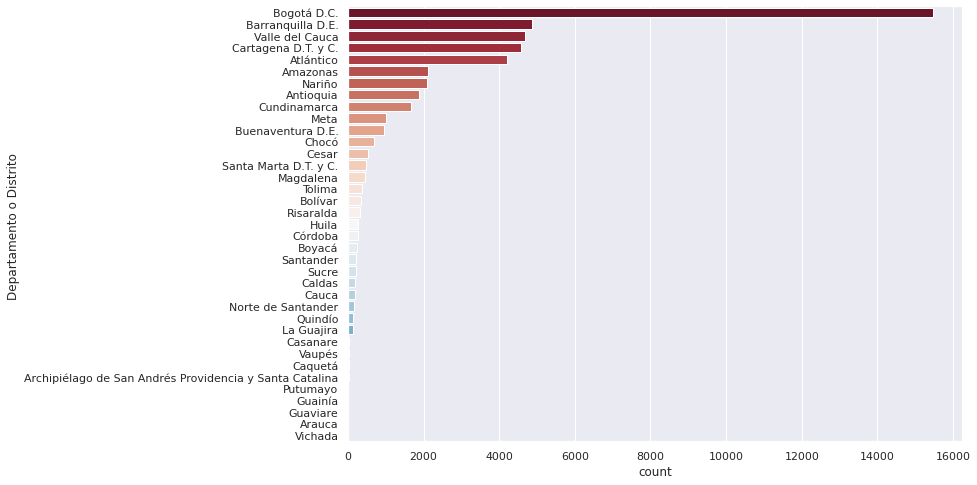

In [7]:
#df['Departamento o Distrito '] = df['Departamento o Distrito '].str
rcParams['figure.figsize'] = 11, 8
#sns.countplot(y = 'Departamento o Distrito ', data = df)
sns.countplot(y = 'Departamento o Distrito ',
              data = df,
              order = df['Departamento o Distrito '].value_counts().index, palette='RdBu')

**Prueba de que todas las horas son "00:00:00.000"**

Se verifica la cantidad de filas de un dataframe compuesto por horas diferentes de 00:00:00.000

In [8]:
print('Fecha de notificación', df[df['Fecha de notificación'].str.slice(11, 23) != '00:00:00.000'].shape[0])
print('Fecha diagnostico', df[df['Fecha diagnostico'].str.slice(11, 23) != '00:00:00.000'].shape[0])

Fecha de notificación 1
Fecha diagnostico 459


In [0]:
df['Fecha de notificación'] = pd.to_datetime(df['Fecha de notificación'])
df['Fecha diagnostico'] = pd.to_datetime(df['Fecha de notificación'])
#df['Fecha recuperado'] = pd.to_datetime(df['Fecha recuperado'])
#df['fecha reporte web'] = pd.to_datetime(df['fecha reporte web']) 	

# **Análisis de los recuperados**

Decripción de los días de recuperación

In [10]:
# cómo se obtuvo el string: df[6500:6501]['Fecha recuperado'].tolist()[0]
#index_recuperados = ~df['Fecha recuperado'].str.contains('-   -') # índices de recuperados con fecha
index_recuperados = ~df['Fecha recuperado'].str.contains('-   -', na=True) # índices de recuperados con fecha
dias_recuperacion = pd.to_datetime(df[index_recuperados]['Fecha recuperado']) - pd.to_datetime(df[index_recuperados]['Fecha de notificación']) 
dias_recuperacion.rename('Días de Recuperación')
dias_recuperacion.dt.days.describe()

count    19344.000000
mean        24.040271
std         10.398640
min          0.000000
25%         16.000000
50%         23.000000
75%         30.000000
max         87.000000
dtype: float64

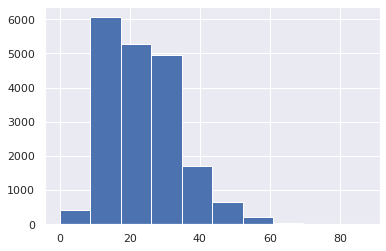

In [11]:
rcParams['figure.figsize'] = [6.0, 4.0] # valores originales
dias_recuperacion.dt.days.hist()

In [0]:
#index_recuperados_F = df[index_recuperados]['Sexo']=='F'
#index_recuperados_M = df[index_recuperados]['Sexo']=='M'
#dias_recuperacion.dt.days[index_recuperados_F].hist()

**Cosas extra**

In [0]:
dates = df['Fecha de notificación']
fds = [];
for i in dates:
  if i.weekday() > 4:
    fds.append('r')
  else:
    fds.append('b')    
df['fds'] = fds

In [14]:
df2 = df[['Fecha de notificación', 'fds']]
df_final = df2.groupby(['Fecha de notificación', 'fds']).size().reset_index(name='casos')
df_final

,Fecha de notificación,fds,casos
0,2020-03-02,b,1
1,2020-03-06,b,1
2,2020-03-07,r,1
3,2020-03-08,r,2
4,2020-03-09,b,3
...,...,...,...
97,2020-06-09,b,782
98,2020-06-10,b,604
99,2020-06-11,b,250
100,2020-06-12,b,39


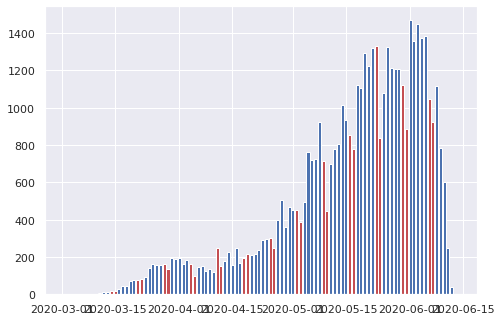

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_final['Fecha de notificación'], df_final['casos'], color=df_final['fds'])
plt.show()

# **Edad de muertes**

In [16]:
import numpy as np
df = df.replace(np.nan, '-   -', regex=True)
index_muertes = ~df['Fecha de muerte'].str.contains('-   -') # índices de recuperados con fecha
df[index_muertes]['Edad'].describe()


count    1637.000000
mean       67.269395
std        16.166126
min         0.000000
25%        58.000000
50%        69.000000
75%        79.000000
max       103.000000
Name: Edad, dtype: float64

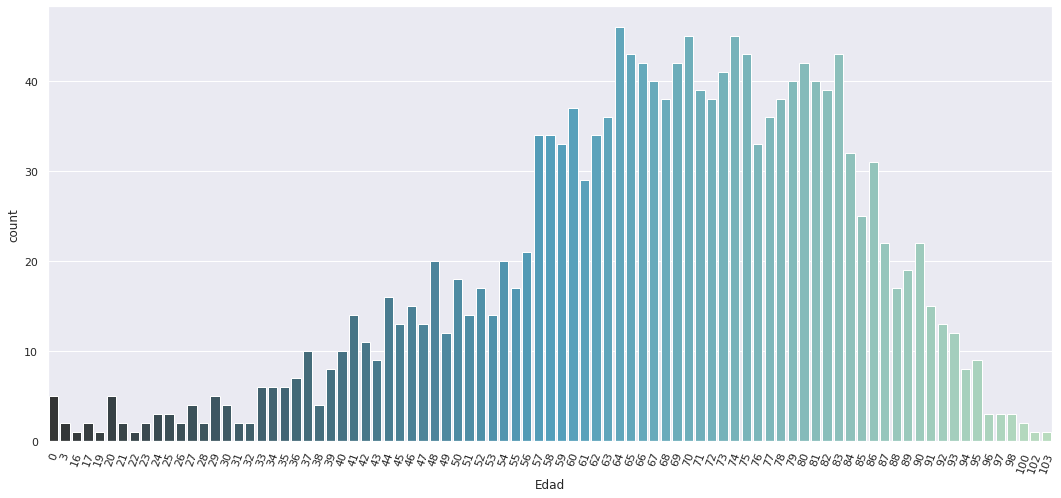

In [17]:
rcParams['figure.figsize'] = 18, 8
ax = sns.countplot('Edad', data = df[index_muertes], palette='GnBu_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
a=2